# Bonstons

#### Imports di base

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:/Users/giann/Documents/GitHub/Bostonshouse/boston.csv")

## Presa di conoscenza del dataset

In [ ]:
# Visualizza le prime 5 righe del dataset
display(df.head())

# Visualizza le ultime 5 righe del dataset
display(df.tail())

# Informazioni generali sulle colonne e tipi di dati
df.info()

# Statistiche descrittive sulle colonne numeriche
display(df.describe())

# Visualizza la dimensione del dataset (righe, colonne)
print("Shape:", df.shape)

# Visualizza i nomi delle colonne
print("Columns:", df.columns.tolist())

# Visualizza il numero di valori nulli per colonna
print("Missing values per column:\n", df.isnull().sum())

### Ricerca delle features più adeguate

In [ ]:
corr = df.corr()
# Stampa tutte le correlazioni con valore alto per ogni colonna
for col in corr.columns:
    high_corr = corr[col][(corr[col].abs() > 0.6) & (corr[col].abs() < 1)]
    high_corr = high_corr.reindex(high_corr.sort_values(ascending=False).index)
    print(f"Colonna '{col}': {len(high_corr)} correlazioni forti")
    if not high_corr.empty:
        print(high_corr)
        print("-" * 40)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Con i dati qui sopra scegliamo le features RM e LSTAT. Sono quelle con le correlazioni più alte.

In [ ]:
X = df[['RM', 'LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizza i dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

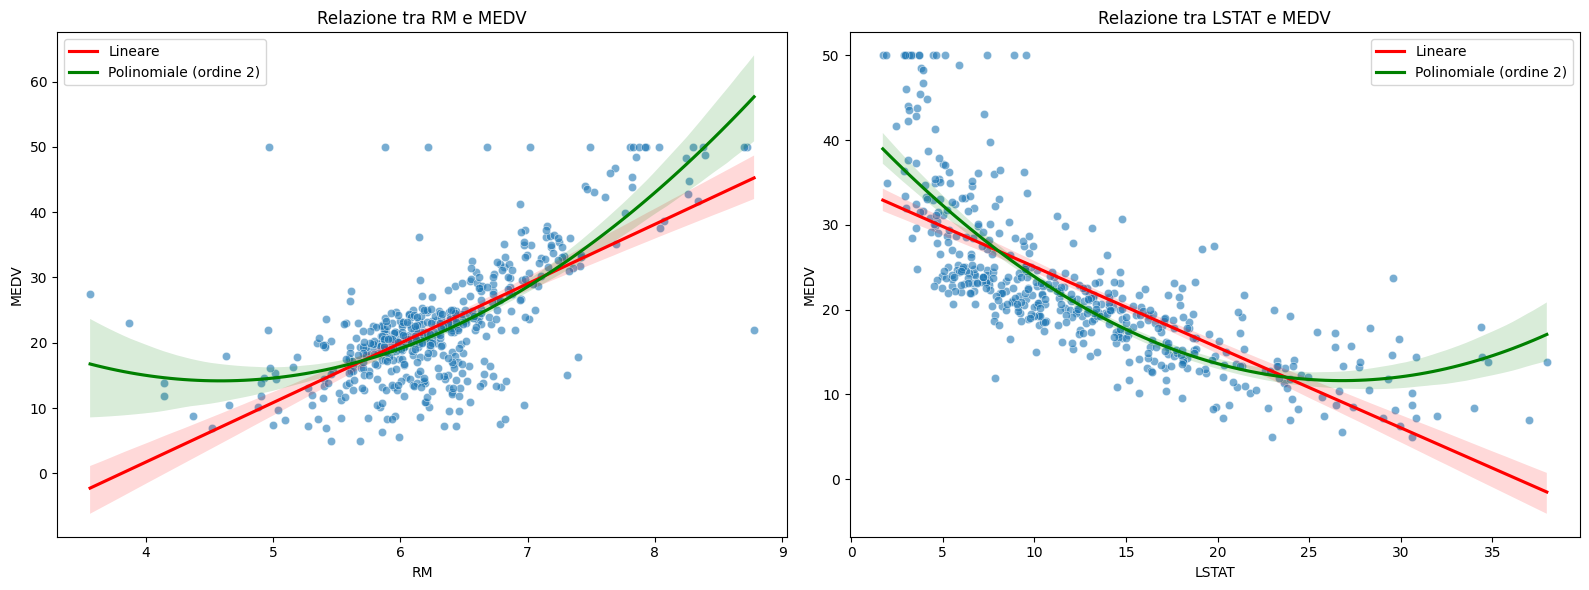

,Feature,R2 Lineare,R2 Polinomiale (Grado 2),R2 Polinomiale (Grado 3),Miglioramento Grado 2 vs Lineare,Miglioramento Grado 3 vs Grado 2
0,RM,0.483525,0.548426,0.561226,0.064900,0.012800
1,LSTAT,0.544146,0.640717,0.657848,0.096571,0.017131


C:\Users\giann\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\giann\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\giann\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


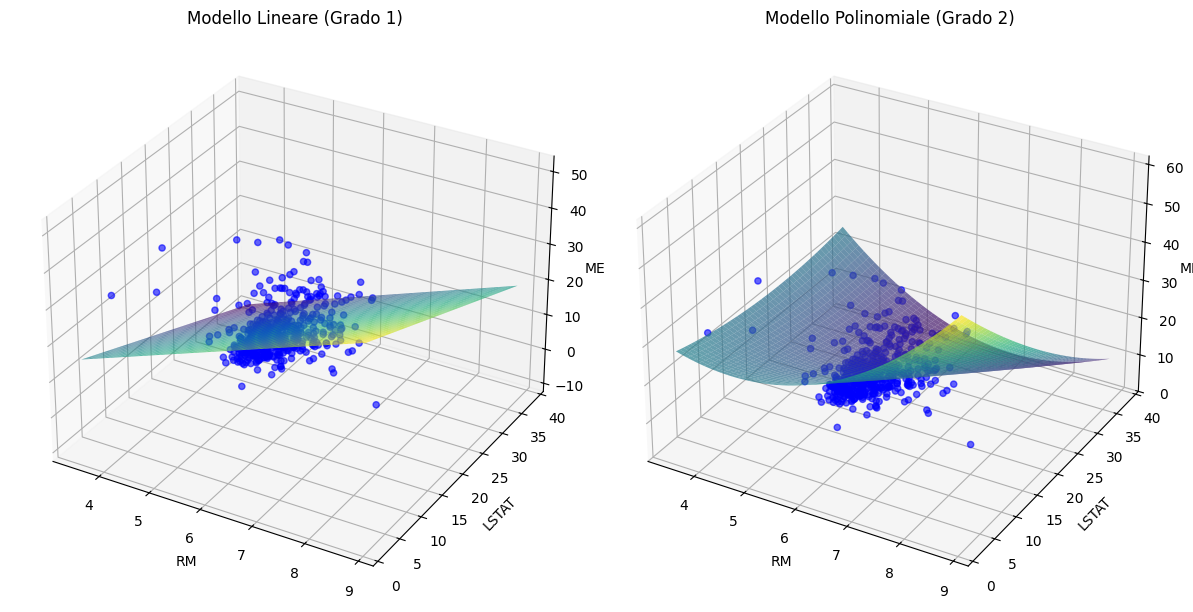

R² del modello lineare: 0.6386
R² del modello polinomiale grado 2: 0.7573
R² del modello polinomiale grado 3: 0.7711


In [12]:
# Verifica della non linearità tramite scatter plot con curve di regressione
plt.figure(figsize=(16, 6))

# Grafico per RM vs MEDV
plt.subplot(1, 2, 1)
sns.scatterplot(x='RM', y='MEDV', data=df, alpha=0.6)
# Aggiungi una regressione lineare
sns.regplot(x='RM', y='MEDV', data=df, scatter=False, color='red', label='Lineare')
# Aggiungi una regressione polinomiale di ordine 2
sns.regplot(x='RM', y='MEDV', data=df, scatter=False, color='green', 
            order=2, label='Polinomiale (ordine 2)')
plt.title('Relazione tra RM e MEDV')
plt.legend()

# Grafico per LSTAT vs MEDV
plt.subplot(1, 2, 2)
sns.scatterplot(x='LSTAT', y='MEDV', data=df, alpha=0.6)
# Aggiungi una regressione lineare
sns.regplot(x='LSTAT', y='MEDV', data=df, scatter=False, color='red', label='Lineare')
# Aggiungi una regressione polinomiale di ordine 2
sns.regplot(x='LSTAT', y='MEDV', data=df, scatter=False, color='green', 
            order=2, label='Polinomiale (ordine 2)')
plt.title('Relazione tra LSTAT e MEDV')
plt.legend()

plt.tight_layout()
plt.show()

# Test della non linearità tramite confronto di modelli
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features = ['RM', 'LSTAT']
results = []

for feature in features:
    # Modello lineare
    X = df[[feature]]
    y = df['MEDV']
    
    model_linear = LinearRegression()
    model_linear.fit(X, y)
    y_pred_linear = model_linear.predict(X)
    r2_linear = r2_score(y, y_pred_linear)
    
    # Modello polinomiale di ordine 2
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_pred_poly = model_poly.predict(X_poly)
    r2_poly = r2_score(y, y_pred_poly)
    
    # Modello polinomiale di ordine 3
    poly3 = PolynomialFeatures(degree=3)
    X_poly3 = poly3.fit_transform(X)
    
    model_poly3 = LinearRegression()
    model_poly3.fit(X_poly3, y)
    y_pred_poly3 = model_poly3.predict(X_poly3)
    r2_poly3 = r2_score(y, y_pred_poly3)
    
    results.append({
        'Feature': feature,
        'R2 Lineare': r2_linear,
        'R2 Polinomiale (Grado 2)': r2_poly,
        'R2 Polinomiale (Grado 3)': r2_poly3,
        'Miglioramento Grado 2 vs Lineare': r2_poly - r2_linear,
        'Miglioramento Grado 3 vs Grado 2': r2_poly3 - r2_poly
    })

# Visualizza i risultati
results_df = pd.DataFrame(results)
display(results_df)

# Visualizzazione 3D per vedere la relazione congiunta
from mpl_toolkits.mplot3d import Axes3D

# Crea un modello polinomiale per la superficie
X = df[['RM', 'LSTAT']]
y = df['MEDV']

# Crea modelli di diverso grado
poly1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly3 = make_pipeline(PolynomialFeatures(3), LinearRegression())

poly1.fit(X, y)
poly2.fit(X, y)
poly3.fit(X, y)

# Crea una griglia per la visualizzazione
x_min, x_max = X['RM'].min() - 0.1, X['RM'].max() + 0.1
y_min, y_max = X['LSTAT'].min() - 0.1, X['LSTAT'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predici i valori per la superficie
Z1 = poly1.predict(grid_points).reshape(xx.shape)
Z2 = poly2.predict(grid_points).reshape(xx.shape)
Z3 = poly3.predict(grid_points).reshape(xx.shape)

# Visualizza i risultati
fig = plt.figure(figsize=(18, 6))

# Superficie lineare
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X['RM'], X['LSTAT'], y, c='blue', marker='o', alpha=0.6)
surf1 = ax1.plot_surface(xx, yy, Z1, cmap=plt.cm.viridis, alpha=0.7)
ax1.set_xlabel('RM')
ax1.set_ylabel('LSTAT')
ax1.set_zlabel('MEDV')
ax1.set_title('Modello Lineare (Grado 1)')

# Superficie polinomiale grado 2
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X['RM'], X['LSTAT'], y, c='blue', marker='o', alpha=0.6)
surf2 = ax2.plot_surface(xx, yy, Z2, cmap=plt.cm.viridis, alpha=0.7)
ax2.set_xlabel('RM')
ax2.set_ylabel('LSTAT')
ax2.set_zlabel('MEDV')
ax2.set_title('Modello Polinomiale (Grado 2)')

plt.tight_layout()
plt.show()

# Stampa i risultati numerici
print(f"R² del modello lineare: {r2_score(y, poly1.predict(X)):.4f}")
print(f"R² del modello polinomiale grado 2: {r2_score(y, poly2.predict(X)):.4f}")
print(f"R² del modello polinomiale grado 3: {r2_score(y, poly3.predict(X)):.4f}")

## Regressione non lineare

In [ ]:

degrees = range(2, 14)
results = []
predictions = []

plt.figure(figsize=(20, 15))
for i, degree in enumerate(degrees):
    # Creazione e addestramento del modello
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # NON SCALATI
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # SCALATI
    # model.fit(X_train_scaled, y_train)
    # y_pred = model.predict(X_test_scaled)
    
    
    # Salva le predizioni e i risultati per dopo
    predictions.append(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Grado': degree, 'mse': mse, 'r2': r2, 'mae': mae})
    
    # Crea un subplot per ogni grado
    plt.subplot(3, 4, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Valori reali')
    plt.ylabel('Predizioni')
    plt.title(f'Grado {degree}: R² = {r2:.2f}, MSE = {mse:.2f}')
    

plt.suptitle('Confronto dei modelli polinomiali per diversi gradi', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Tabella del confronto dei risultati

In [ ]:
results_df = pd.DataFrame(results)
display(results_df)
plt.figure(figsize=(12, 6))

# MSE
plt.subplot(1, 3, 1)
plt.plot(degrees, [r['mse'] for r in results], 'o-', label='MSE')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MSE vs Grado polinomiale')
plt.xticks(list(degrees))

# MAE
plt.subplot(1, 3, 2)
plt.plot(degrees, [r['mae'] for r in results], 's-', label='MAE', color='orange')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MAE vs Grado polinomiale')
plt.xticks(list(degrees))

# R²
plt.subplot(1, 3, 3)
plt.plot(degrees, [r['r2'] for r in results], 'o-', color='green')
plt.xlabel('Grado polinomiale')
plt.ylabel('R²')
plt.title('R² vs Grado polinomiale')
plt.xticks(list(degrees))

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
# RANGE LIMITATO PER VISUALIZZARE MEGLIO
limited_degrees = range(2, 7)

# MSE 
plt.subplot(1, 3, 1)
plt.plot(limited_degrees, [results[i-2]['mse'] for i in limited_degrees], 'o-', label='MSE')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MSE vs Grado polinomiale')
plt.xticks(list(limited_degrees))

# MAE
plt.subplot(1, 3, 2)
plt.plot(limited_degrees, [results[i-2]['mae'] for i in limited_degrees], 's-', label='MAE', color='orange')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MAE vs Grado polinomiale')
plt.xticks(list(limited_degrees))

# R²
plt.subplot(1, 3, 3)
plt.plot(limited_degrees, [results[i-2]['r2'] for i in limited_degrees], 'o-', color='green')
plt.xlabel('Grado polinomiale')
plt.ylabel('R²')
plt.title('R² vs Grado polinomiale')
plt.xticks(list(limited_degrees))

plt.tight_layout()
plt.show()

### Selezione del miglior modello in base a R²

In [ ]:
best_idx = max(range(len(results)), key=lambda i: results[i]['r2'])
best_degree = results[best_idx]['Grado']
best_pred = predictions[best_idx]

print(f"Il modello migliore ha grado {best_degree} con R² = {results[best_idx]['r2']:.4f}")

# Visualizza il modello in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['RM'], X_test['LSTAT'], y_test, color='g', label='Valori Reali')
ax.scatter(X_test['RM'], X_test['LSTAT'], best_pred, color='r', label='Valori Predetti')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.set_title(f'3D Scatter Plot del modello migliore (grado {best_degree})')
plt.legend()
plt.show()

## Extra

##### Grafici relazione tra RM, LSTAT e MEDV

In [ ]:
plt.figure(figsize=(16, 8))

# Grafico RM vs MEDV (valori predetti)
plt.scatter(X_test['RM'], best_pred, color='r', alpha=0.7, label='Valori predetti')
plt.scatter(X_test['RM'], y_test, color='b', alpha=0.3, label='Valori reali')
plt.xlabel('RM (numero medio di stanze)')
plt.ylabel('MEDV (prezzo medio)')
plt.title(f'Confronto tra valori reali e predetti (grado {best_degree})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 8))

# Grafico LSTAT vs MEDV (valori predetti)
plt.scatter(X_test['LSTAT'], best_pred, color='r', alpha=0.7, label='Valori predetti')
plt.scatter(X_test['LSTAT'], y_test, color='b', alpha=0.3, label='Valori reali')
plt.xlabel('LSTAT (% popolazione a basso status)')
plt.ylabel('MEDV (prezzo medio)')
plt.title(f'Confronto tra valori reali e predetti (grado {best_degree})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

##### Calcolo residui (Reali - Predetti)

In [ ]:
best_residuals = y_test - best_pred

plt.figure(figsize=(12, 6))
sns.histplot(best_residuals, kde=True, bins=30, color='blue', alpha=0.6)
plt.title(f"Distribuzione dei residui (grado {best_degree})")
plt.xlabel("Errore (Valore reale - Predetto)")
plt.ylabel("Frequenza")
plt.tight_layout()

plt.show()